In [ ]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment=None
pd.options.display.max_columns=999

import re
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
from scipy import sparse
from datetime import datetime
from numpy import nan
from wordcloud import WordCloud

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer

import re
from bs4 import BeautifulSoup

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


## **Data reading and encoding**

In [ ]:
train = pd.read_csv('train_new.csv',encoding='latin1')
test = pd.read_csv('test_new.csv',encoding='latin1')

In [ ]:
train['Patient_Tag'].value_counts(normalize = True)

0    0.792567
1    0.207433
Name: Patient_Tag, dtype: float64

In [ ]:
#Oversampling of train data

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
train.shape, test.shape

((1157, 9), (571, 10))

In [ ]:
train.head()

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,7/5/2016,19:42:00,5/8/16 5:12,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0


In [ ]:
test.head()

,Index,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Unnamed: 9
0,1,BLOG,uhmagonline.com,http://uhmagonline.com/son-of-the-late-kimbo-s...,7/30/2016,0:41:23,NaN,NaN,"Baby Slice, the son of the late Kimbo Slice, h...",NaN
1,2,FORUMS,implantinformationnetwork.yuku.com,http://implantinformationnetwork.yuku.com/topi...,6/20/2016,0:07:30,6/20/2016 9:37,My Story --,"<p><font face=""sans-serif"" size=""3"">I have had...",NaN
2,3,BLOG,http://cestlapharm.blogspot.com,http://cestlapharm.blogspot.com/2016/06/us-fda...,6/15/2016,15:44:00,6/16/2016 1:14,US FDA ?????canagliflozin?dapagliflozin?????????,"Previously, sodium-glucose cotransporter-2 (SG...",NaN
3,4,FORUMS,healthboards.com,http://www.healthboards.com/boards/heart-disor...,7/17/2016,19:41:00,NaN,NaN,Hello. I suffer from congestive heart failure ...,NaN
4,5,BLOG,http://www.sciencecodex.com,http://www.sciencecodex.com/vitamin_d_improves...,4/4/2016,15:30:45,5/4/16 1:00,"Vitamin D improves heart function, study finds",A daily dose of vitamin D3 improves heart func...,NaN


In [ ]:
test.drop('Unnamed: 9', axis=1, inplace=True)

In [ ]:
train.isnull().sum(), test.isnull().sum()

(Source               0
 Host                59
 Link                 0
 Date(ET)             0
 Time(ET)             0
 time(GMT)          161
 Title              216
 TRANS_CONV_TEXT      1
 Patient_Tag          0
 dtype: int64, Index                0
 Source               0
 Host                30
 Link                 0
 Date(ET)             0
 Time(ET)             0
 time(GMT)           91
 Title              117
 TRANS_CONV_TEXT      0
 dtype: int64)

In [ ]:
train.info()

In [ ]:
test['Time(ET)'].replace('6/20/2016','20:00:00',inplace=True)

In [ ]:
train['time_object'] = train['Time(ET)'].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())
test['time_object'] = test['Time(ET)'].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())

In [ ]:
test=test[['Index', 'Source', 'Host', 'Link', 'Date(ET)', 'Time(ET)', 'time(GMT)',
       'Title', 'TRANS_CONV_TEXT']]

**Removing null values**

In [ ]:
train['Title'].fillna('Other',inplace=True)
test['Title'].fillna('Other',inplace=True)

In [ ]:
train.isnull().any()

Source             False
Host                True
Link               False
Date(ET)           False
Time(ET)           False
time(GMT)           True
Title              False
TRANS_CONV_TEXT     True
Patient_Tag        False
time_object        False
dtype: bool

In [ ]:
##Fill the null value in conversation with title value
train['TRANS_CONV_TEXT'].fillna(train['Title'],inplace=True)
test['TRANS_CONV_TEXT'].fillna(test['Title'],inplace=True)

## **Working on text columns to create features**

**word count feature**

In [ ]:
train['word_count_conv'] = train['TRANS_CONV_TEXT'].apply(lambda x: len(str(x).split(" ")))
train['word_count_title'] = train['Title'].apply(lambda x: len(str(x).split(" ")))
train['word_count_link'] = train['Link'].apply(lambda x: len(str(x).split("/")))


test['word_count_conv'] = test['TRANS_CONV_TEXT'].apply(lambda x: len(str(x).split(" ")))
test['word_count_title'] = test['Title'].apply(lambda x: len(str(x).split(" ")))
test['word_count_link'] = test['Link'].apply(lambda x: len(str(x).split("/")))

**character count feature**

In [ ]:
train['char_count_conv'] = train['TRANS_CONV_TEXT'].str.len() ## this also includes spaces
train['char_count_title'] = train['Title'].str.len() ## this also includes spaces
train['char_count_link'] = train['Link'].str.len() ## this also includes spaces

test['char_count_conv'] = test['TRANS_CONV_TEXT'].str.len() ## this also includes spaces
test['char_count_title'] = test['Title'].str.len() ## this also includes spaces
test['char_count_link'] = test['Link'].str.len() ## this also includes spaces

**avg word len**

In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

def avg_word_link(sentence):
  words = sentence.split('/')
  return (sum(len(word) for word in words)/len(words))

train['avg_word_conv'] = train['TRANS_CONV_TEXT'].apply(lambda x: avg_word(x))
train['avg_word_title'] = train['Title'].apply(lambda x: avg_word(x))
train['avg_word_link'] = train['Link'].apply(lambda x: avg_word_link(x))

test['avg_word_conv'] = test['TRANS_CONV_TEXT'].apply(lambda x: avg_word(x))
test['avg_word_title'] = test['Title'].apply(lambda x: avg_word(x))
test['avg_word_link'] = test['Link'].apply(lambda x: avg_word_link(x))


**no of stopwords**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

train['stopwords_conv'] = train['TRANS_CONV_TEXT'].apply(lambda x: len([x for x in x.split() if x in stop]))
test['stopwords_conv'] = test['TRANS_CONV_TEXT'].apply(lambda x: len([x for x in x.split() if x in stop]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**no of numerics**

In [ ]:
train['numerics_conv'] = train['TRANS_CONV_TEXT'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
test['numerics_conv'] = test['TRANS_CONV_TEXT'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))


**no of uppercase**

In [ ]:
train['upper_conv'] = train['TRANS_CONV_TEXT'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
test['upper_conv'] = test['TRANS_CONV_TEXT'].apply(lambda x: len([x for x in x.split() if x.isupper()]))


##**Date (ET) Features **

In [ ]:
train['Date(ET)'].replace('Jun','6', inplace=True)
temp=train['Date(ET)'].apply(lambda x: x.replace('Jun','6') if('Jun' in x) else x )
temp=temp.apply(lambda x: x.split('-')[1]+'/'+x.split('-')[0]+'/20'+x.split('-')[2] if('-' in x) else x )
train['Date(ET)'] = temp
train['Date(ET)']=train['Date(ET)'].apply(lambda x: x.replace('Jul','7') if('Jul' in x) else x )

from datetime import datetime
train['Date(ET)']=train['Date(ET)'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y') )


temp=test['Date(ET)'].apply(lambda x: x.replace('Jun','6') if('Jun' in x) else x )
temp=temp.apply(lambda x: x.split('-')[1]+'/'+x.split('-')[0]+'/20'+x.split('-')[2] if('-' in x) else x )
test['Date(ET)'] = temp
test['Date(ET)']=test['Date(ET)'].apply(lambda x: x.replace('Jul','7') if('Jul' in x) else x )
test['Date(ET)'].replace('2015/D=FDA/20D', '6/20/2016', inplace=True)

from datetime import datetime
test['Date(ET)']=test['Date(ET)'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y') )

train["year"] = train['Date(ET)'].dt.year
train["month"]= train['Date(ET)'].dt.month
train["day"] = train['Date(ET)'].dt.day
train["hour"]= train['Date(ET)'].dt.hour
train["dayofyear"]= train['Date(ET)'].dt.dayofyear
train["week"]= train['Date(ET)'].dt.week
train["weekofyear"]= train['Date(ET)'].dt.weekofyear
train["dayofweek"]= train['Date(ET)'].dt.dayofweek
train["weekday"]= train['Date(ET)'].dt.weekday
train["quarter"]= train['Date(ET)'].dt.quarter

test["year"] =test['Date(ET)'].dt.year
test["month"]= test['Date(ET)'].dt.month
test["day"] = test['Date(ET)'].dt.day
test["hour"]= test['Date(ET)'].dt.hour
test["dayofyear"]= test['Date(ET)'].dt.dayofyear
test["week"]= test['Date(ET)'].dt.week
test["weekofyear"]= test['Date(ET)'].dt.weekofyear
test["dayofweek"]= test['Date(ET)'].dt.dayofweek
test["weekday"]= test['Date(ET)'].dt.weekday
test["quarter"]= test['Date(ET)'].dt.quarter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


## **Time(ET) features**

In [ ]:
from numpy import nan
train['Time2(ET)'] = train['Time(ET)'].apply(lambda x : nan if('AM' in x) else( nan if('PM' in x) else x)) 

train['time2(GMT)'] = train['time(GMT)'].apply(lambda x: x.split()[1] if(len(str(x).split())>1) else x)
train['Time2(ET)'].fillna(train['time2(GMT)']+':00', inplace=True)

import re
pattern = re.compile("^(2[0-3]|[01]?[0-9]):([0-5]?[0-9]):([0-5]?[0-9])$")
train['Time2(ET)'] = train['Time2(ET)'].apply(lambda  x : x if(pattern.match(str(x))) else 'h:m:s')

train['Time(ET)_hour'] = train['Time2(ET)'].apply(lambda x : x.split(':')[0])
train['Time(ET)_minute'] = train['Time2(ET)'].apply(lambda x : x.split(':')[1])
train['Time(ET)_seconds'] = train['Time2(ET)'].apply(lambda x : x.split(':')[2])

train['Time(ET)_hour'].replace('h',nan, inplace=True)

train['Time(ET)_minute'].replace('m',nan, inplace=True)
train['Time(ET)_seconds'].replace('s',nan, inplace=True)

train['Time(ET)_hour'].fillna("8", inplace=True)
train['Time(ET)_seconds'].fillna("00", inplace=True)
train['Time(ET)_minute'].fillna("00", inplace=True)

train['Time(ET)_hour'] =train['Time(ET)_hour'].apply(lambda x: int(x))
train['Time(ET)_seconds'] = train['Time(ET)_seconds'].apply(lambda x: int(x))
train['Time(ET)_minute'] =train['Time(ET)_minute'].apply(lambda x: int(x))

from numpy import nan
test['Time2(ET)'] = test['Time(ET)'].apply(lambda x : nan if('AM' in x) else( nan if('PM' in x) else x)) 
test['time2(GMT)'] = test['time(GMT)'].apply(lambda x: x.split()[1] if(len(str(x).split())>1) else x)
test['Time2(ET)'].fillna(train['time2(GMT)']+':00', inplace=True)
import re
pattern = re.compile("^(2[0-3]|[01]?[0-9]):([0-5]?[0-9]):([0-5]?[0-9])$")
test['Time2(ET)'] = test['Time2(ET)'].apply(lambda  x : x if(pattern.match(str(x))) else 'h:m:s')
test['Time(ET)_hour'] = test['Time2(ET)'].apply(lambda x : x.split(':')[0])
test['Time(ET)_minute'] = test['Time2(ET)'].apply(lambda x : x.split(':')[1])
test['Time(ET)_seconds'] = test['Time2(ET)'].apply(lambda x : x.split(':')[2])
test['Time(ET)_hour'].replace('h',nan, inplace=True)
test['Time(ET)_minute'].replace('m',nan, inplace=True)
test['Time(ET)_seconds'].replace('s',nan, inplace=True)

test['Time(ET)_hour'].fillna("8", inplace=True)
test['Time(ET)_seconds'].fillna("00", inplace=True)
test['Time(ET)_minute'].fillna("00", inplace=True)

test['Time(ET)_hour'] =test['Time(ET)_hour'].apply(lambda x: int(x))
test['Time(ET)_seconds'] = test['Time(ET)_seconds'].apply(lambda x: int(x))
test['Time(ET)_minute'] =test['Time(ET)_minute'].apply(lambda x: int(x))

train['Time(ET)_hour_class'] = train['Time(ET)_hour']
train['Time(ET)_hour_class']=train['Time(ET)_hour_class'].apply(lambda x: 1 if(x>=0 and x<6) else(2 if(x>=6 and x<12) else(3 if(x>=12 and x<18) 
                                  else(4 if(x>=18 and x<=23)else x))))
train['Time(ET)_hour_class'] = train['Time(ET)_hour_class'].astype(str)

test['Time(ET)_hour_class'] = test['Time(ET)_hour']
test['Time(ET)_hour_class']=test['Time(ET)_hour_class'].apply(lambda x: 1 if(x>=0 and x<6) else(2 if(x>=6 and x<12) else(3 if(x>=12 and x<18) 
                                  else(4 if(x>=18 and x<=23)else x))))
test['Time(ET)_hour_class'] = test['Time(ET)_hour_class'].astype(str)


In [ ]:
train_hour = pd.get_dummies(train['Time(ET)_hour_class'], prefix ="Time(ET)_hour_class")
train.drop('Time(ET)_hour_class',axis=1,inplace=True)
train = pd.concat([train, train_hour], axis=1)
test_hour = pd.get_dummies(test['Time(ET)_hour_class'], prefix ="Time(ET)_hour_class")
test.drop('Time(ET)_hour_class',axis=1,inplace=True)
test = pd.concat([test, test_hour], axis=1)


In [ ]:
train_tr1=train.groupby('Time(ET)_hour').size()
train_tr1=train_tr1.to_frame().reset_index()
train_tr1['count'] = train_tr1[0]
train_tr1.drop(0,axis=1, inplace=True)

traintemp = train.merge(train_tr1, on='Time(ET)_hour', how = 'left') 
train = traintemp.copy()
#del traintemp

train['hour_freq_class'] = train['count']


test_tr1=test.groupby('Time(ET)_hour').size()
test_tr1=test_tr1.to_frame().reset_index()
test_tr1['count'] = test_tr1[0]
test_tr1.drop(0,axis=1, inplace=True)

testtemp = test.merge(test_tr1, on='Time(ET)_hour', how = 'left') 
test = testtemp.copy()
#del testtemp

test['hour_freq_class'] = test['count']

train['hour_freq_class'] = train['hour_freq_class'].apply(lambda x: '1' if(x==154) else('2' if(x<=65 and x>=50) else ('3' if(x>=40 and x<=49) else '4')))
test['hour_freq_class'] = test['hour_freq_class'].apply(lambda x: '1' if(x==86) else('2' if(x<=33 and x>=22) else ('3' if(x>=18 and x<=21) else '4')))


In [ ]:
train_freq = pd.get_dummies(train['hour_freq_class'],prefix='hour_freq_class')
train.drop('hour_freq_class',axis=1,inplace=True)
train = pd.concat([train, train_freq], axis=1)

test_freq = pd.get_dummies(test['hour_freq_class'],prefix='hour_freq_class')
test.drop('hour_freq_class',axis=1,inplace=True)
test = pd.concat([test, test_freq], axis=1)


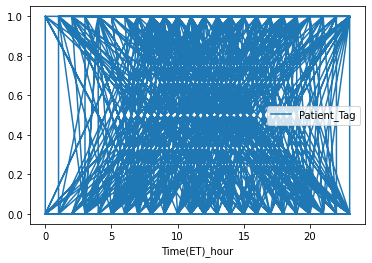

In [ ]:
train.plot(x ='Time(ET)_hour', y='Patient_Tag', kind = 'line')

##**Working on Source column **

In [ ]:
train['Source'].unique(), test['Source'].unique()

(array(['FORUMS', 'BLOG', 'Facebook', 'FACEBOOK', 'YOUTUBE'], dtype=object),
 array(['BLOG', 'FORUMS', 'Facebook', 'YOUTUBE', 'FACEBOOK'], dtype=object))

In [ ]:
train['Source'].replace('Facebook','FACEBOOK', inplace=True)
test['Source'].replace('Facebook','FACEBOOK', inplace=True)

In [ ]:
tr1 = pd.get_dummies(train['Source'], prefix = 'Source')
train.drop('Source',axis=1,inplace=True)
train = pd.concat([train, tr1], axis=1)

te1 = pd.get_dummies(test['Source'], prefix = 'Source')
test.drop('Source',axis=1,inplace=True)
test = pd.concat([test, te1], axis=1)

In [ ]:
train.columns

Index(['Host', 'Link', 'Date(ET)', 'Time(ET)', 'time(GMT)', 'Title',
       'TRANS_CONV_TEXT', 'Patient_Tag', 'time_object', 'word_count_conv',
       'word_count_title', 'word_count_link', 'char_count_conv',
       'char_count_title', 'char_count_link', 'avg_word_conv',
       'avg_word_title', 'avg_word_link', 'stopwords_conv', 'numerics_conv',
       'upper_conv', 'year', 'month', 'day', 'hour', 'dayofyear', 'week',
       'weekofyear', 'dayofweek', 'weekday', 'quarter', 'Time2(ET)',
       'time2(GMT)', 'Time(ET)_hour', 'Time(ET)_minute', 'Time(ET)_seconds',
       'Time(ET)_hour_class_1', 'Time(ET)_hour_class_2',
       'Time(ET)_hour_class_3', 'Time(ET)_hour_class_4', 'count',
       'hour_freq_class_2', 'hour_freq_class_3', 'hour_freq_class_4',
       'Source_BLOG', 'Source_FACEBOOK', 'Source_FORUMS', 'Source_YOUTUBE',
       'link_cleaned'],
      dtype='object')

In [ ]:
train_numerical = train[['word_count_conv', 'word_count_title',
       'word_count_link', 'char_count_conv', 'char_count_title',
       'char_count_link', 'avg_word_conv', 'avg_word_title', 'avg_word_link',
       'numerics_conv', 'stopwords_conv', 'upper_conv', 'year',
       'month', 'day', 'hour', 'dayofyear', 'week', 'weekofyear', 'dayofweek',
       'weekday', 'quarter', 'Time(ET)_hour',
       'Time(ET)_minute', 'Time(ET)_seconds', 'Time(ET)_hour_class_1',
       'Time(ET)_hour_class_2', 'Time(ET)_hour_class_3',
       'Time(ET)_hour_class_4', 'count', 'hour_freq_class_1',
       'hour_freq_class_2', 'hour_freq_class_3', 'hour_freq_class_4',
       'Source_BLOG', 'Source_FACEBOOK', 'Source_FORUMS', 'Source_YOUTUBE']]

test_numerical = test[['word_count_conv', 'word_count_title',
       'word_count_link', 'char_count_conv', 'char_count_title',
       'char_count_link', 'avg_word_conv', 'avg_word_title', 'avg_word_link',
       'numerics_conv', 'stopwords_conv', 'upper_conv', 'year',
       'month', 'day', 'hour', 'dayofyear', 'week', 'weekofyear', 'dayofweek',
       'weekday', 'quarter', 'Time(ET)_hour',
       'Time(ET)_minute', 'Time(ET)_seconds', 'Time(ET)_hour_class_1',
       'Time(ET)_hour_class_2', 'Time(ET)_hour_class_3',
       'Time(ET)_hour_class_4', 'count', 'hour_freq_class_1',
       'hour_freq_class_2', 'hour_freq_class_3', 'hour_freq_class_4',
       'Source_BLOG', 'Source_FACEBOOK', 'Source_FORUMS', 'Source_YOUTUBE']]

##**Working on Link column**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
def url_to_words(raw_text):
    raw_text=BeautifulSoup(raw_text).text
    raw_text=raw_text.strip()
    
    no_coms=re.sub(r'\.com','',raw_text)
    no_urls=re.sub('https?://www','',no_coms)
    no_urls1=re.sub('https?://','',no_urls)
    try:
        no_encoding=no_urls1.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        no_encoding = no_urls1
    letters_only = re.sub("[^a-zA-Z]", " ",no_encoding) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    stemmer = SnowballStemmer("english", ignore_stopwords=True)
    meaningful_words1=[stemmer.stem(word) for word in meaningful_words]
    return( " ".join( meaningful_words1 ))

In [ ]:
train['link_cleaned'] = train['Link'].apply(lambda x: url_to_words(x))
test['link_cleaned'] = test['Link'].apply(lambda x: url_to_words(x))

train['Host'] = train['Host'].apply(lambda x: url_to_words(x))
test['Host'] = test['Host'].apply(lambda x: url_to_words(x))

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://cafepharma.com/boards/threads/epstein.596312/#post-5688458" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.patient.co.uk/forums/discuss/enlarged-heart-511396?order=latest#2095508" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://abcnewsradioonline.com/entertainment-news/queen-latifah-joins-american-heart-associations-red-steps-ca.html?utm_source=feedburner&utm_me

TypeError: ignored

**lower case**

In [ ]:
train['link_cleaned'] = train['link_cleaned'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test['link_cleaned'] = test['link_cleaned'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [ ]:
train['link_cleaned'].head()

0                 cafepharma board thread epstein post
1    patient co uk forum discuss enlarg heart order...
2    abcnewsradioonlin entertain news queen latifah...
3                       cancer forum net viewtop php f
4    diyaudio forum loung diy silver interconnect r...
Name: link_cleaned, dtype: object

**remove punctuation**

In [ ]:
train['link_cleaned'] = train['link_cleaned'].str.replace('[^\w\s]','')
test['link_cleaned'] = test['link_cleaned'].str.replace('[^\w\s]','')


## **Workin on Title column**

**lowercase**

In [ ]:
train['Title'] = train['Title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test['Title'] = test['Title'].apply(lambda x: " ".join(x.lower() for x in x.split()))


**removing punctuation**

In [ ]:
train['Title'] = train['Title'].str.replace('[^\w\s]','')
test['Title'] = test['Title'].str.replace('[^\w\s]','')

train['Host'] = train['Host'].str.replace('[^\w\s]','')
test['Host'] = test['Host'].str.replace('[^\w\s]','')

## **Pre-Processing**

**lower case**

In [ ]:
train['TRANS_CONV_TEXT'] = train['TRANS_CONV_TEXT'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test['TRANS_CONV_TEXT'] = test['TRANS_CONV_TEXT'].apply(lambda x: " ".join(x.lower() for x in x.split()))

train['Host'] = train['Host'].apply(lambda x: " ".join(x.lower() for x in x.split()))
test['Host'] = test['Host'].apply(lambda x: " ".join(x.lower() for x in x.split()))

**remove punctuation**

In [ ]:
train['TRANS_CONV_TEXT'] = train['TRANS_CONV_TEXT'].str.replace('[^\w\s]','')
test['TRANS_CONV_TEXT'] = test['TRANS_CONV_TEXT'].str.replace('[^\w\s]','')


train['Host'] = train['Host'].str.replace('[^\w\s]','')
test['Host'] = test['Host'].str.replace('[^\w\s]','')

**removal of stopwords**

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['TRANS_CONV_TEXT'] = train['TRANS_CONV_TEXT'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
test['TRANS_CONV_TEXT'] = test['TRANS_CONV_TEXT'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

**common word removal**

In [ ]:
freq_tr = pd.Series(' '.join(train['TRANS_CONV_TEXT']).split()).value_counts()[:10]
freq_tr = list(freq_tr.index)
train['TRANS_CONV_TEXT'] = train['TRANS_CONV_TEXT'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_tr))

freq_te = pd.Series(' '.join(train['TRANS_CONV_TEXT']).split()).value_counts()[:10]
freq_te = list(freq_te.index)
test['TRANS_CONV_TEXT'] = test['TRANS_CONV_TEXT'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_te))

**rare words removal**

In [ ]:
freq_tr = pd.Series(' '.join(train['TRANS_CONV_TEXT']).split()).value_counts()[-10:]
freq_tr = list(freq_tr.index)
train['TRANS_CONV_TEXT'] = train['TRANS_CONV_TEXT'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_tr))

freq_te = pd.Series(' '.join(train['TRANS_CONV_TEXT']).split()).value_counts()[-10:]
freq_te = list(freq_te.index)
test['TRANS_CONV_TEXT'] = test['TRANS_CONV_TEXT'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_te))

**Lemmatization**

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from textblob import Word
train['TRANS_CONV_TEXT'] = train['TRANS_CONV_TEXT'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
test['TRANS_CONV_TEXT'] = test['TRANS_CONV_TEXT'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

## **TF IDF Implementation**

In [ ]:
train['TRANS_CONV_TEXT'].head()

0    dont disagree principle im saying entresto maj...
1    always dizzy get dizzy standing made get slow ...
2    axellebauergriffinfilmmagicnew york queen lati...
3    17 throwing year nowalmost everyday thrown twi...
4    quote originally posted boyan silyavski wake f...
Name: TRANS_CONV_TEXT, dtype: object

In [ ]:
train['Title'][1]

'enlarged heartthread enlarged heart'

In [ ]:
from wordcloud import WordCloud

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)
#for i in range(len(sentences)):

train['Conversation']=train['TRANS_CONV_TEXT'].map(lambda x: preprocess(x))
test['Conversation']=test['TRANS_CONV_TEXT'].map(lambda x: preprocess(x))
train['Title1'] = train['Title'].map(lambda x: preprocess(x))
test['Title1'] = test['Title'].map(lambda x: preprocess(x))

In [ ]:
patient_dt=train[train['Patient_Tag']==1]['TRANS_CONV_TEXT']
patient_title=train[train['Patient_Tag']==1]['Title']

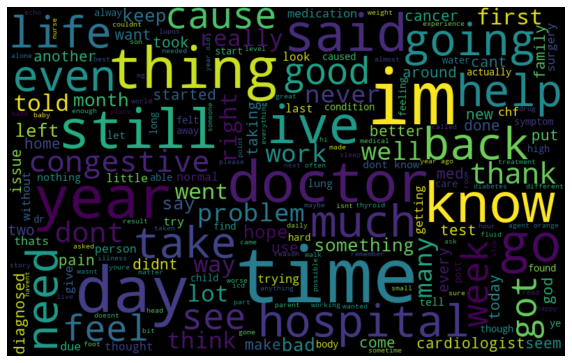

In [ ]:
all_words = ' '.join([text for text in patient_dt ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

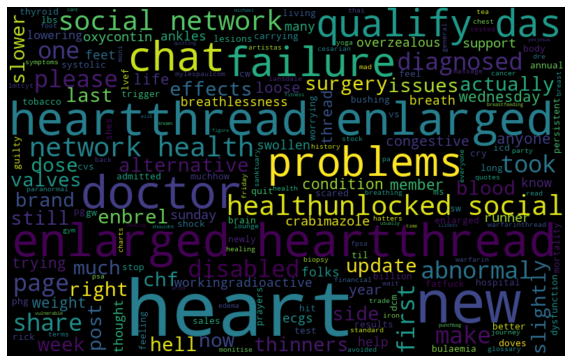

In [ ]:
all_words = ' '.join([text for text in patient_title ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
word_set_conv={'heart','failure','hospital','doctor','doctors','time','congestive','now','need','said','still','know','thing','medication',
              'hep','month','good','lot','lung','CHF','chf','cause','issue','people','many','feel','taking','really','think',
              'something','much','keep','thank','thanks','year','going','drug','medicine','surgery','life',
              'first','better','taking','going','people','well','pain','cancer','problem','test','Dr','thyroid','one','blood','med',
          'diagnosed','much','thread','abnormal','slightly','iron','illness','treatment','enlarged','bulaemia','body','admitted','sickness',
          'sick','abnormal','heal','slower','stop', 'worrying','diagnosed' }

In [ ]:
risky=['doctor','enlarged', 'heart','time','patient','hospital','take','congestive','well','cause','going','said']

In [ ]:
#Word Finder Conversation
def word_finder(x):
  df_words = set(x.split(' '))
  extract_words =  word_set_conv.intersection(df_words)
  return ', '.join(extract_words)

train['extract'] = train['TRANS_CONV_TEXT'].apply(word_finder)
test['extract'] = test['TRANS_CONV_TEXT'].apply(word_finder)

In [ ]:
train['Title'].head()

0                                              epstein
1                  enlarged heartthread enlarged heart
2    queen latifah joins american heart association...
3                                             bulaemia
4                    diy silver interconnects and rcas
Name: Title, dtype: object

In [ ]:
#Word Finder Title
def word_finder1(x):
  df_words = set(x.split(' '))
  extract_words = list(set(risky) & set(df_words))
  return extract_words

train['title_extract'] = train['Title'].apply(word_finder1)
test['title_extract'] = test['Title'].apply(word_finder1)

In [ ]:
train['title_extract'].head()

0                   []
1    [heart, enlarged]
2              [heart]
3                   []
4                   []
Name: title_extract, dtype: object

In [ ]:
train['word_set_count']=train['extract'].apply(lambda x: x.count(",") + 1 )
test['word_set_count']=test['extract'].apply(lambda x: x.count(",") + 1)


train['word_title_count']=train['title_extract'].apply(lambda x: len(x) )
test['word_title_count']=test['title_extract'].apply(lambda x: len(x))

In [ ]:
train.shape, test.shape

((1157, 53), (571, 53))

In [ ]:
train[train['Patient_Tag']==1].head()

,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag,word_count_conv,word_count_title,word_count_link,char_count_conv,char_count_title,char_count_link,avg_word_conv,avg_word_title,avg_word_link,stopwords_conv,numerics_conv,upper_conv,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,Time2(ET),time2(GMT),Time(ET)_hour,Time(ET)_minute,Time(ET)_seconds,Time(ET)_hour_class_1,Time(ET)_hour_class_2,Time(ET)_hour_class_3,Time(ET)_hour_class_4,count,hour_freq_class_1,hour_freq_class_2,hour_freq_class_3,hour_freq_class_4,Source_BLOG,Source_FACEBOOK,Source_FORUMS,Source_YOUTUBE,link_cleaned,extract,title_extract,word_set_count,word_title_count
1,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,2016-05-07,0.820833333,42498.21667,enlarged heartthread enlarged heart,always dizzy get dizzy standing made get slow ...,1,101,4,6,478,36,82,3.742574,8.250,12.833333,44,2,8,2016,5,7,0,128,18,18,5,5,2,h:m:s,42498.21667,8,0,0,0,1,0,0,154,1,0,0,0,0,0,1,0,patient co uk forum discuss enlarg heart order...,"heart, cancer, hospital, going","[heart, enlarged]",4,2
3,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,2016-06-18,20:46:00,6/19/2016 6:16,bulaemia,17 throwing year nowalmost everyday thrown twi...,1,415,1,4,2289,8,56,4.518072,8.000,13.250000,160,4,17,2016,6,18,0,170,24,24,5,5,2,20:46:00,6:16,20,46,0,0,0,0,1,65,0,1,0,0,0,0,1,0,cancer forum net viewtop php f,"drug, need, good, really, life, cause, year, c...",[],18,0
6,www.reddit.com,https://www.reddit.com/r/todayilearned/comment...,2016-05-02,0.047916667,42492.44375,til that cvs took a 2 billion hit to annual sa...,course got diagnosed congestive type 2 diabete...,1,70,16,9,349,81,123,4.000000,4.125,12.777778,29,2,3,2016,5,2,0,123,18,18,0,0,2,h:m:s,42492.44375,8,0,0,0,1,0,0,154,1,0,0,0,0,0,1,0,reddit r todayilearn comment hd ry til cvs too...,"year, congestive, diagnosed, time",[],4,0
10,modelmayhem.com,http://www.modelmayhem.com/forums/post/960268/...,2016-07-15,15:49:00,NaN,other,looknsee photography wrote living bay area cal...,1,297,1,7,1542,5,60,4.195286,5.000,7.714286,114,4,16,2016,7,15,0,197,28,28,4,4,3,15:49:00,NaN,15,49,0,0,0,1,0,53,0,1,0,0,0,0,1,0,modelmayhem forum post post,"good, really, hospital, year, much, congestive...",[],7,0
14,www.fark.com,http://www.fark.com/comments/9116353/Now-is-wh...,2016-04-21,10:17:00,4/21/2016 19:47,9116353 now is when doves cry,russ1642 another antiscience antimedicine pers...,1,87,7,6,485,34,76,4.586207,4.000,11.833333,33,0,2,2016,4,21,0,112,16,16,3,3,2,10:17:00,19:47,10,17,0,0,1,0,0,50,0,1,0,0,0,0,1,0,fark comment dove cri cpp c,"much, know, thread, med, still",[],5,0


In [ ]:
test.head()

,Index,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,word_count_conv,word_count_title,word_count_link,char_count_conv,char_count_title,char_count_link,avg_word_conv,avg_word_title,avg_word_link,stopwords_conv,numerics_conv,upper_conv,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,Time2(ET),time2(GMT),Time(ET)_hour,Time(ET)_minute,Time(ET)_seconds,Time(ET)_hour_class_1,Time(ET)_hour_class_2,Time(ET)_hour_class_3,Time(ET)_hour_class_4,count,hour_freq_class_1,hour_freq_class_2,hour_freq_class_3,hour_freq_class_4,Source_BLOG,Source_FACEBOOK,Source_FORUMS,Source_YOUTUBE,link_cleaned,extract,title_extract,word_set_count,word_title_count
0,1,uhmagonline.com,http://uhmagonline.com/son-of-the-late-kimbo-s...,2016-07-30,0:41:23,NaN,other,baby slice son late kimbo slice signed profess...,256,1,5,1417,5,89,4.539062,5.000000,17.000000,93,2,13,2016,7,30,0,212,30,30,5,5,3,0:41:23,NaN,0,41,23,1,0,0,0,22,0,1,0,0,1,0,0,0,uhmagonlin son late kimbo slice babi slice fig...,"failure, congestive, going, one, heart, still",[],6,0
1,2,implantinformationnetwork.yuku.com,http://implantinformationnetwork.yuku.com/topi...,2016-06-20,0:07:30,6/20/2016 9:37,my story,pfont facesansserif size3i silicone salinefill...,290,3,6,1843,11,63,5.358621,3.000000,9.666667,85,2,14,2016,6,20,0,172,25,25,0,0,2,0:07:30,9:37,0,7,30,1,0,0,0,22,0,1,0,0,0,0,1,0,implantinformationnetwork yuku topic stori,"failure, better, keep, much, doctor, feel, fir...",[],12,0
2,3,http://cestlapharm.blogspot.com,http://cestlapharm.blogspot.com/2016/06/us-fda...,2016-06-15,15:44:00,6/16/2016 1:14,us fda canagliflozindapagliflozin,previously sodiumglucose cotransporter2 sglt2 ...,497,3,6,3272,48,79,5.585513,15.333333,12.333333,131,18,27,2016,6,15,0,167,24,24,2,2,2,15:44:00,1:14,15,44,0,0,0,1,0,27,0,1,0,0,1,0,0,0,cestlapharm blogspot us fda canagliflozin dapa...,"drug, failure, month, congestive, blood, medic...",[],12,0
3,4,healthboards.com,http://www.healthboards.com/boards/heart-disor...,2016-07-17,19:41:00,NaN,other,hello suffer congestive heart failure due mi i...,146,1,6,813,5,100,4.575342,5.000000,15.833333,49,3,10,2016,7,17,0,199,28,28,6,6,3,19:41:00,NaN,19,41,0,0,0,0,1,33,0,1,0,0,0,0,1,0,healthboard board heart disord congest heart f...,"failure, month, congestive, blood, think, hear...",[],7,0
4,5,http://www.sciencecodex.com,http://www.sciencecodex.com/vitamin_d_improves...,2016-04-04,15:30:45,4/5/2016 1:00,vitamin d improves heart function study finds,daily dose vitamin d3 improves heart function ...,49,7,4,304,46,80,5.224490,5.714286,19.250000,14,0,4,2016,4,4,0,95,14,14,0,0,2,15:30:45,1:00,15,30,45,0,0,1,0,27,0,1,0,0,1,0,0,0,sciencecodex vitamin improv heart function stu...,"failure, hospital, medicine, heart, people",[heart],5,1


In [ ]:
train[train['Patient_Tag']==1]['word_set_count'].unique()

array([ 4, 18,  7,  5, 13,  9,  3, 11,  1,  6, 19, 20, 16,  2, 10,  8, 14,
       12, 17, 15, 23, 34, 21, 25])

In [ ]:
train[train['Patient_Tag']==0]['word_set_count'].unique()

array([ 9,  2,  7, 17,  1, 12, 13,  4, 19,  6,  3, 27,  5, 23, 11,  8, 15,
       20, 18, 10, 14, 21, 22, 16, 34, 28, 24, 26, 25, 32])

In [ ]:
train[train['Patient_Tag']==1]['word_title_count'].unique()

array([2, 0, 1])

In [ ]:
train[train['Patient_Tag']==0]['word_title_count'].unique()

array([0, 1, 2, 3])

In [ ]:
y=train['Patient_Tag']
train_dup=train.copy()
test_dup=test.copy()
train_dup.drop('Patient_Tag',axis=1,inplace=True)
train_dup.drop('extract',axis=1,inplace=True)
train_dup.drop('title_extract',axis=1,inplace=True)

test_dup.drop('extract',axis=1,inplace=True)
test_dup.drop('title_extract',axis=1,inplace=True)

In [ ]:
train_dup.head()

,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,word_count_conv,word_count_title,word_count_link,char_count_conv,char_count_title,char_count_link,avg_word_conv,avg_word_title,avg_word_link,stopwords_conv,numerics_conv,upper_conv,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,Time2(ET),time2(GMT),Time(ET)_hour,Time(ET)_minute,Time(ET)_seconds,Time(ET)_hour_class_1,Time(ET)_hour_class_2,Time(ET)_hour_class_3,Time(ET)_hour_class_4,count,hour_freq_class_1,hour_freq_class_2,hour_freq_class_3,hour_freq_class_4,Source_BLOG,Source_FACEBOOK,Source_FORUMS,Source_YOUTUBE,link_cleaned,word_set_count,word_title_count
0,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,2016-06-15,13:58:00,6/15/2016 23:28,epstein,dont disagree principle im saying entresto maj...,346,1,7,2204,7,65,5.372832,7.000000,8.428571,134,0,5,2016,6,15,0,167,24,24,2,2,2,13:58:00,23:28,13,58,0,0,0,1,0,49,0,0,1,0,0,0,1,0,cafepharma board thread epstein post,9,0
1,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,2016-05-07,0.820833333,42498.21667,enlarged heartthread enlarged heart,always dizzy get dizzy standing made get slow ...,101,4,6,478,36,82,3.742574,8.250000,12.833333,44,2,8,2016,5,7,0,128,18,18,5,5,2,h:m:s,42498.21667,8,0,0,0,1,0,0,154,1,0,0,0,0,0,1,0,patient co uk forum discuss enlarg heart order...,4,2
2,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,2016-04-14,15:00:38,4/15/2016 0:30,queen latifah joins american heart association...,axellebauergriffinfilmmagicnew york queen lati...,314,9,5,1839,69,248,4.859873,6.777778,48.800000,131,0,8,2016,4,14,0,105,15,15,3,3,2,15:00:38,0:30,15,0,38,0,0,1,0,53,0,1,0,0,1,0,0,0,abcnewsradioonlin entertain news queen latifah...,9,1
3,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,2016-06-18,20:46:00,6/19/2016 6:16,bulaemia,17 throwing year nowalmost everyday thrown twi...,415,1,4,2289,8,56,4.518072,8.000000,13.250000,160,4,17,2016,6,18,0,170,24,24,5,5,2,20:46:00,6:16,20,46,0,0,0,0,1,65,0,1,0,0,0,0,1,0,cancer forum net viewtop php f,18,0
4,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,2016-06-15,3:26:00,6/15/2016 12:56,diy silver interconnects and rcas,quote originally posted boyan silyavski wake f...,70,5,6,375,36,94,4.371429,6.400000,14.833333,32,0,3,2016,6,15,0,167,24,24,2,2,2,3:26:00,12:56,3,26,0,1,0,0,0,40,0,0,1,0,0,0,1,0,diyaudio forum loung diy silver interconnect r...,2,0


In [ ]:
#Oversampling

**train-test-split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xvalid, ytrain, yvalid = train_test_split(train_dup, train['Patient_Tag'], random_state=42, test_size=0.3)

In [ ]:
train_dup.columns, test_dup.columns

(Index(['Host', 'Link', 'Date(ET)', 'Time(ET)', 'time(GMT)', 'Title',
        'TRANS_CONV_TEXT', 'word_count_conv', 'word_count_title',
        'word_count_link', 'char_count_conv', 'char_count_title',
        'char_count_link', 'avg_word_conv', 'avg_word_title', 'avg_word_link',
        'stopwords_conv', 'numerics_conv', 'upper_conv', 'year', 'month', 'day',
        'hour', 'dayofyear', 'week', 'weekofyear', 'dayofweek', 'weekday',
        'quarter', 'Time2(ET)', 'time2(GMT)', 'Time(ET)_hour',
        'Time(ET)_minute', 'Time(ET)_seconds', 'Time(ET)_hour_class_1',
        'Time(ET)_hour_class_2', 'Time(ET)_hour_class_3',
        'Time(ET)_hour_class_4', 'count', 'hour_freq_class_1',
        'hour_freq_class_2', 'hour_freq_class_3', 'hour_freq_class_4',
        'Source_BLOG', 'Source_FACEBOOK', 'Source_FORUMS', 'Source_YOUTUBE',
        'link_cleaned', 'word_set_count', 'word_title_count'],
       dtype='object'),
 Index(['Index', 'Host', 'Link', 'Date(ET)', 'Time(ET)', 'time(GMT)', 'T

In [ ]:
#Combining train and test
combi = train_dup.append(test_dup, ignore_index=True)

In [ ]:
combi.tail()

,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,word_count_conv,word_count_title,word_count_link,char_count_conv,char_count_title,char_count_link,avg_word_conv,avg_word_title,avg_word_link,stopwords_conv,numerics_conv,upper_conv,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,Time2(ET),time2(GMT),Time(ET)_hour,Time(ET)_minute,Time(ET)_seconds,Time(ET)_hour_class_1,Time(ET)_hour_class_2,Time(ET)_hour_class_3,Time(ET)_hour_class_4,count,hour_freq_class_1,hour_freq_class_2,hour_freq_class_3,hour_freq_class_4,Source_BLOG,Source_FACEBOOK,Source_FORUMS,Source_YOUTUBE,link_cleaned,word_set_count,word_title_count,Index
1723,http://news.health.com,http://news.health.com/2016/06/21/long-work-ho...,2016-06-21,15:37:02,6/22/2016 1:07,long work hours may hurt your health,kathleen doheny healthday reporter tuesday jun...,749,7,8,4361,36,71,4.823765,4.285714,8.000000,263,21,4,2016,6,21,0,173,25,25,1,1,2,15:37:02,1:07,15,37,2,0,0,1,0,27,0,1,0,0,1,0,0,0,news health long work hour may hurt health,20,0,567.0
1724,http://kyw.cbslocal.com,http://philadelphia.cbslocal.com/2016/02/12/75...,2016-02-12,1:15:17,2/12/2016 6:15,the stethoscope,kyw report sponsored independence blue cross d...,176,2,8,1120,15,51,5.369318,7.000000,5.500000,70,1,3,2016,2,12,0,43,6,6,4,4,1,1:15:17,6:15,1,15,17,1,0,0,0,16,0,0,0,1,1,0,0,0,philadelphia cbslocal,6,0,568.0
1725,http://www.sciencecodex.com,http://www.sciencecodex.com/how_much_you_weigh...,2016-06-19,11:34:16,6/19/2016 21:04,how much you weigh as a teenager is linked to ...,surprisingly increased heart failure found men...,65,18,4,340,86,121,4.246154,3.833333,29.500000,30,2,2,2016,6,19,0,171,24,24,6,6,2,11:34:16,21:04,11,34,16,0,1,0,0,33,0,1,0,0,1,0,0,0,sciencecodex much weigh teenag link risk heart...,3,1,569.0
1726,www.reddit.com,https://www.reddit.com/r/opiates/comments/4p7l...,2016-06-21,19:15:00,6/22/2016 4:45,feel like something is seriously wrong health ...,every morning wake kidney hurt bad cant bed fe...,159,8,9,713,50,117,3.490566,5.375000,12.111111,71,4,1,2016,6,21,0,173,25,25,1,1,2,19:15:00,4:45,19,15,0,0,0,0,1,33,0,1,0,0,0,0,1,0,reddit r opiat comment p led feel like someth ...,12,0,570.0
1727,healthunlocked.com,https://healthunlocked.com/afassociation/posts...,2016-06-06,0:26:00,6/6/2016 9:56,healthunlocked the social network for health,hi im site give small insight heart condition ...,324,7,7,1761,46,85,4.438272,5.714286,11.285714,130,3,19,2016,6,6,0,158,23,23,0,0,2,0:26:00,9:56,0,26,0,1,0,0,0,22,0,1,0,0,0,0,1,0,healthunlock afassoci post ach heart week,10,0,571.0


In [ ]:
combi_valid = xtrain.append(xvalid, ignore_index=True)

**Using Conversation, Title, Link  columns**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix

####  Conversation TFIDF Features
combi_host_tfidf = tfidf_vectorizer.fit_transform(combi['Host'])
combi_valid_host_tfidf = tfidf_vectorizer.fit_transform(combi_valid['Host'])

combi_con_tfidf = tfidf_vectorizer.fit_transform(combi['TRANS_CONV_TEXT'])
combi_valid_con_tfidf = tfidf_vectorizer.fit_transform(combi_valid['TRANS_CONV_TEXT'])

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=500, stop_words='english')
combi_title_tfidf = tfidf_vectorizer.fit_transform(combi['Title'])
combi_valid_title_tfidf = tfidf_vectorizer.fit_transform(combi_valid['Title'])

combi_link_tfidf = tfidf_vectorizer.fit_transform(combi['link_cleaned'])
combi_valid_link_tfidf = tfidf_vectorizer.fit_transform(combi_valid['link_cleaned'])

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()


combi_host_tfidf1 = (scaler.fit_transform(combi_host_tfidf)).toarray()
combi_valid_host_tfidf1 = (scaler.fit_transform(combi_valid_host_tfidf)).toarray()

combi_con_tfidf1 = (scaler.fit_transform(combi_con_tfidf)).toarray()
combi_valid_con_tfidf1 = (scaler.fit_transform(combi_valid_con_tfidf)).toarray()


combi_title_tfidf1 = (scaler.fit_transform(combi_title_tfidf)).toarray()
combi_valid_title_tfidf1 = (scaler.fit_transform(combi_valid_title_tfidf)).toarray()


combi_link_tfidf1 = (scaler.fit_transform(combi_link_tfidf)).toarray()
combi_valid_link_tfidf1 = (scaler.fit_transform(combi_valid_link_tfidf)).toarray()



**Concatenating all 3 TF IDF features**

In [ ]:
combi_tfidf = np.concatenate((combi_host_tfidf1,combi_con_tfidf1,combi_title_tfidf1,combi_link_tfidf1) ,axis=1)
combi_valid_tfidf = np.concatenate((combi_valid_host_tfidf1,combi_valid_con_tfidf1,combi_valid_title_tfidf1, combi_valid_link_tfidf1) , axis=1)


In [ ]:
train_tfidf = combi_tfidf[:1157, :]
test_tfidf = combi_tfidf[1157:, :]


xtrain_tfidf = combi_valid_tfidf[:809,:]
xvalid_tfidf = combi_valid_tfidf[809:,:]

**Save Patient_Tag in y variable**

In [ ]:
y = train['Patient_Tag']

## ** Model Building**

**Model for text features**

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import metrics

In [ ]:
xtrain_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03144709, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08210237, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05577268, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**validation**

In [ ]:
model = svm.SVC(kernel='linear', C=0.5, gamma=1, decision_function_shape = 'ovo', shrinking = True ,probability= True)
model.fit(xtrain_tfidf, ytrain)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
predict_svm= model.predict_proba(xvalid_tfidf)

In [ ]:
predict_svm= model.predict_proba(xvalid_tfidf)
predict_svm = [row[1] for row in predict_svm]


In [ ]:
#accuracy_score(yvalid,predict_svm) 

### **Model for Numerical Features**

In [ ]:
tr = xtrain[['word_count_conv', 'word_count_title',
       'word_count_link', 'char_count_conv', 'char_count_title',
       'char_count_link', 'avg_word_conv', 'avg_word_title', 'avg_word_link',
       'numerics_conv', 'stopwords_conv', 'upper_conv', 'year',
       'month', 'day', 'hour', 'dayofyear', 'week', 'weekofyear', 'dayofweek',
       'weekday', 'quarter', 'Time(ET)_hour',
       'Time(ET)_minute', 'Time(ET)_seconds', 'Time(ET)_hour_class_1',
       'Time(ET)_hour_class_2', 'Time(ET)_hour_class_3',
       'Time(ET)_hour_class_4', 'count', 'hour_freq_class_1',
       'hour_freq_class_2', 'hour_freq_class_3', 'hour_freq_class_4',
       'Source_BLOG', 'Source_FACEBOOK', 'Source_FORUMS', 'Source_YOUTUBE']]

te = xvalid[['word_count_conv', 'word_count_title',
       'word_count_link', 'char_count_conv', 'char_count_title',
       'char_count_link', 'avg_word_conv', 'avg_word_title', 'avg_word_link',
       'numerics_conv', 'stopwords_conv', 'upper_conv', 'year',
       'month', 'day', 'hour', 'dayofyear', 'week', 'weekofyear', 'dayofweek',
       'weekday', 'quarter', 'Time(ET)_hour',
       'Time(ET)_minute', 'Time(ET)_seconds', 'Time(ET)_hour_class_1',
       'Time(ET)_hour_class_2', 'Time(ET)_hour_class_3',
       'Time(ET)_hour_class_4', 'count', 'hour_freq_class_1',
       'hour_freq_class_2', 'hour_freq_class_3', 'hour_freq_class_4',
       'Source_BLOG', 'Source_FACEBOOK', 'Source_FORUMS', 'Source_YOUTUBE']]

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

**validation**

In [ ]:
xgb1.fit(tr, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
pred_xgb = xgb1.predict_proba(te)

In [ ]:
pred_xgb = [row[1] for row in pred_xgb]


In [ ]:
outdf1=pd.DataFrame({'Patient_Tag_xgb':pred_xgb ,'Patient_Tag_svm_tfidf': predict_svm})

In [ ]:
outdf1.head()

,Patient_Tag_xgb,Patient_Tag_svm_tfidf
0,0.000100,0.005716
1,0.000300,0.416688
2,0.000020,0.005506
3,0.000059,0.133224
4,0.999881,0.052588


**Take average of the two probabilities**

In [ ]:
outdf1['Patient_Tag'] = (outdf1['Patient_Tag_xgb'] +  outdf1['Patient_Tag_svm_tfidf'])/2

In [ ]:
outdf1.head()

,Patient_Tag_xgb,Patient_Tag_svm_tfidf,Patient_Tag
0,0.000100,0.005716,0.002908
1,0.000300,0.416688,0.208494
2,0.000020,0.005506,0.002763
3,0.000059,0.133224,0.066641
4,0.999881,0.052588,0.526235


**Round off the average to get 1 andf 0**

In [ ]:
outdf1['Patient_Tag'] = outdf1['Patient_Tag'].apply(lambda x: 1 if(x>0.45) else 0)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(yvalid, outdf1['Patient_Tag'])
metrics.auc(fpr,tpr)

0.9129019530479384

In [ ]:
accuracy_score(yvalid,outdf1['Patient_Tag'])

0.9482758620689655

##**Building both Models on whole dataset**

**SVM On Text Data**

In [ ]:
model = svm.SVC(kernel='linear', C=0.5, gamma=1, decision_function_shape = 'ovo', shrinking = True ,probability= True)
model.fit(train_tfidf, y)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
predict_tfidf_svm = model.predict_proba(test_tfidf)
predict_tfidf_svm = [row[1] for row in predict_tfidf_svm]


**XGBoost on Numerical Features**

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [ ]:
xgb1.fit(train_numerical, y)
predict_numerical_xgb = xgb1.predict_proba(test_numerical)
predict_numerical_xgb = [row[1] for row in predict_numerical_xgb]


## **Ensemble the SVM model and the XGB model**

In [ ]:
outdf1=pd.DataFrame({'Index': test['Index'],'Patient_Tag_tfidf_svm':predict_tfidf_svm ,'Patient_Tag_numerical_xgb': predict_numerical_xgb})

In [ ]:
outdf1.head()

,Index,Patient_Tag_tfidf_svm,Patient_Tag_numerical_xgb
0,1,0.084938,0.213179
1,2,0.523299,0.000078
2,3,0.046477,0.000091
3,4,0.803860,0.996146
4,5,0.002751,0.000040


In [ ]:
outdf1['Patient_Tag'] = (outdf1['Patient_Tag_tfidf_svm'] + outdf1['Patient_Tag_numerical_xgb'])/2

In [ ]:
outdf1.head()

,Index,Patient_Tag_tfidf_svm,Patient_Tag_numerical_xgb,Patient_Tag
0,1,0.117531,0.213179,0.165355
1,2,0.647036,0.000078,0.323557
2,3,0.029999,0.000091,0.015045
3,4,0.891779,0.996146,0.943963
4,5,0.001783,0.000040,0.000911


In [ ]:
outdf1['Patient_Tag'] = outdf1['Patient_Tag'].apply(lambda x : 1 if(x>0.45) else 0)

In [ ]:
submission = outdf1[['Index','Patient_Tag']]

In [ ]:
submission.head()

,Index,Patient_Tag
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


In [ ]:
submission['Patient_Tag'].unique()

array([0, 1])

In [ ]:
submission.to_csv('tf_idf_appr.csv', index=False)